# Economic Development with Subsistence Needs

In [1]:
alpha = 0.3  # contrubution of capital
delta = 0.05  # depreciation
beta = 0.95  # discount rate

# some key values
kss = (alpha/(1/beta-(1-delta)))**(1/(1-alpha))  # k under steady state
k_upper = (1/delta)**(1/(1-alpha))  # maximum k
k0 = kss/2  # initial value of k
k_g = (alpha/delta)**(1/(1-alpha))  # golden path k

cneed = 0
def css(k):
    return(k**alpha-delta*k)
c_max = css(k_g) # maximun consumption
c_ss = css(kss)

## Backward integration

In [2]:
# a function to solve the equation
def solvefunc(k,c):
    x_min = 0
    x_max = k_upper
    while (x_max-x_min) > 1e-10:
        x = (x_max+x_min)/2
        t = x**alpha+(1-delta)*x-c-k
        if t > 0:
            x_max = x
        else:
            x_min = x
    return(x)

In [59]:
import numpy as np
# backward integration
def cpth_back(c0, n=100):
    k = np.zeros((n,1))  # save data
    c = np.zeros((n,1))
    stp = np.zeros((n,1))
    stp[0] = 100
    k[0] = kss
    c[0] = c0
    for i in range(n-1):
        c[i+1] = (c[i]-cneed)/(beta*(alpha*k[i]**(alpha-1)+\
                                     (1-delta)))+cneed
        k[i+1] = solvefunc(k[i], c[i+1])
        if k[i+1] <= 0:
            k[i+1] = 0
            break
        if c[i+1] == 0:
            c[i+1] <= 0
            break
        # k0 judgement remains to complete
        if k[i+1] <= k0:
            stp[0] = i
            break
    result = np.hstack((k,c,stp))
    return(result)

# bisection method is not required
c0 = c_ss - 0.001
simulation_0 = cpth_back(c0)
n = int(simulation_0[0,2])
k = np.zeros((n,1))
c = np.zeros((n,1))
s = np.zeros((n,1))
income = np.zeros((n-1,1))

for i in range(n):
    k[n-i-1] = simulation_0[i,0]  # acrrued capital
    c[n-i-1] = simulation_0[i,1]  # consumption path
    s[n-i-1] = 1-(c[n-i-1]/k[n-i-1]**alpha)  # saving rate
    if (n-i-1) <= n-2:
        income[n-i-1] = (k[n-i]/k[n-i-1])**alpha-1
simulation_1 = np.hstack((k,c))

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('png', 'pdf')

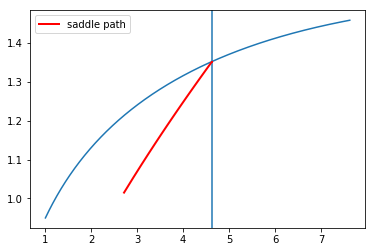

In [56]:
fig, ax = plt.subplots()
k_simulation=np.linspace(1, kss+3, 500)
ax.plot(k_simulation,css(k_simulation))
plt.axvline(kss)
ax.plot(simulation_1[:,0], simulation_1[:,1], 'r-',\
        linewidth=2, label=r'saddle path')
ax.legend(loc='upper left')

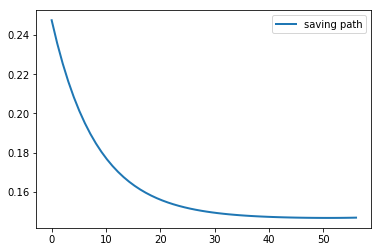

In [57]:
# time path of saving rate
fig, ax = plt.subplots()
time = np.linspace(0,n,n)
ax.plot(time, s, linewidth=2, label=r'saving path')
ax.legend(loc='upper right')

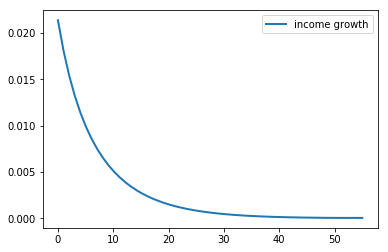

In [61]:
# growth rate of per capita income
# per capita income is the output in the economy, for there is no 
    # population growth.
fig, ax = plt.subplots()
time = np.linspace(0,n-1,n-1)
ax.plot(time, income, linewidth=2, label=r'income growth')
ax.legend(loc='upper right')

Economic interpretation of the results:
- Policy function illustrate the relationship between consumption and capital stock. According to our simulation, both consumption and capital stock converge to the steady state.
- Saving rate decreases as time goes by.
- Income growth rate also decreasess as time goes by. At the beginning of the economy, more saving contributed to the economy grow the. But to much saving will undermine the consumption, wich brings utility to the households.

## Forward shooting

In [7]:
# re-calibration
cneed = 1

In [63]:
# Note: In Python, indent is of particular importance
# calculate consumption path under initial consumption level
def cpth(c0, n=100):  # iliterate n times
    k = np.zeros((n,1))  # save data
    c = np.zeros((n,1))
    k[0] = k0
    c[0] = c0
    for i in range(n-1):
        k[i+1] = k[i]**alpha-c[i]+(1-delta)*k[i]
        if k[i+1] <= 0:
            k[i+1] = 0
            break
        c[i+1] = (c[i]-cneed)*beta*(alpha*k[i+1]**(alpha-1)\
                                    +(1-delta))+cneed
    result = np.hstack((k,c))
    return(result)

# bisection method
c0_min = 0.001
c0_max = c_max
while (c0_max-c0_min) > 1e-10:
    c0 = (c0_max+c0_min)/2
    simulation = cpth(c0)
    if simulation[len(simulation)-1,0] <= kss:
        c0_max = c0
    else:
        c0_min = c0

kf = np.zeros((100,1))
cf = np.zeros((100,1))
sf = np.zeros((100,1))
incomef = np.zeros((99,1))

for i in range(100):
    kf[i] = simulation[i,0]  # acrrued capital
    cf[i] = simulation[i,1]  # consumption path
    sf[i] = 1-(cf[i]/kf[i]**alpha)  # saving rate
    if i >= 1:
        incomef[i-1] = (kf[i]/kf[i-1])**alpha-1
        
simulation_2 = np.hstack((kf,cf))

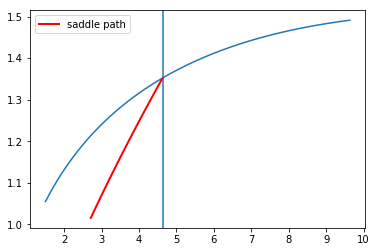

In [66]:
fig, ax = plt.subplots()
k_simulation=np.linspace(1.5, kss+5, 500)
ax.plot(k_simulation,css(k_simulation))
plt.axvline(kss)
ax.plot(simulation_2[:,0], simulation_2[:,1], 'r-',\
        linewidth=2, label=r'saddle path')
ax.legend(loc='upper left')

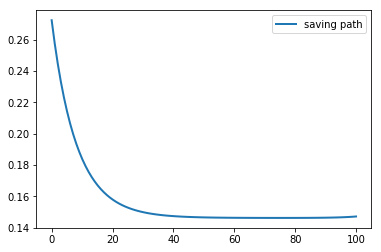

In [68]:
# time path of saving rate
fig, ax = plt.subplots()
time = np.linspace(0,100,100)
ax.plot(time, sf, linewidth=2, label=r'saving path')
ax.legend(loc='upper right')

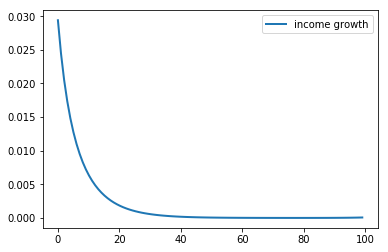

In [69]:
fig, ax = plt.subplots()
time = np.linspace(0,99,99)
ax.plot(time, incomef, linewidth=2, label=r'income growth')
ax.legend(loc='upper right')

1. It converge slower than the case in (1).
2. The path of saving rate is differenti from (1). Let's illustrate it.

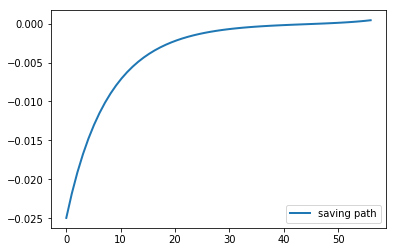

In [77]:
sco = np.zeros((n,1))
for i in range(n):
    sco[i] = s[i] - sf[i]
# time path of saving rate difference
fig, ax = plt.subplots()
time = np.linspace(0,n,n)
ax.plot(time, sco, linewidth=2, label=r'saving path')
ax.legend(loc='lower right')

We can see that the saving rate wil subsistance need is always lesser.